In [1]:
"""
PCA and LDA imlementation from scratch using numpy
and a few experiments and visualizations of these algorithms
for Fault Detection and Identification Course, KNTU, Spring 2023.

Programmed by Ardavan Modarres
ardavan.modarres@email.kntu.ac.ir
* 2023-04-26: Initial coding
"""

'\nPCA and LDA imlementation from scratch using numpy\nand a few experiments and visualizations of these algorithms\nfor Fault Detection and Identification Course, KNTU, Spring 2023.\n\nProgrammed by Ardavan Modarres\nardavan.modarres@email.kntu.ac.ir\n* 2023-04-26: Initial coding\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")

# 1-PCA

## Example 1

### Using **custom PCA** class

In [3]:
class Custom_PCA:
    def __init__(self, num_components:int)->None:
        self.n_components = num_components   # number components you want to preserve

    def fit(self, X):
        '''this method takes the input, center it around the mean,
           computes covariance matrix of the input data, computes eigenvalues
           and eigenvectores of covariance matrix and forms the Transformaion Matrix'''
        # centering around the mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # calculating covariance matrix, covariance, function getss samples as columns
        cov = np.cov(X.T)
        # calculating eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # reordering eigenvectors based on magnitude of eigenvalues
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1] # sort eigenvectors
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # preserving first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        '''this function takes input data and return the transformed version of the input based on
           the Transformation Matrix we calculated previously in 'fit' method.'''
        X = X - self.mean    # mean centering
        return np.dot(X, self.components.T) # returning projected data along principal components directions

#### Generating a simple distribution

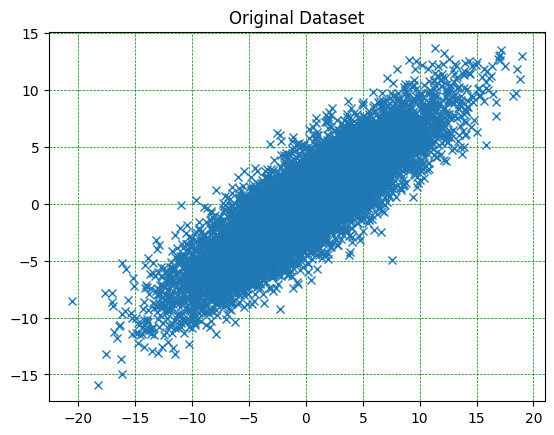

In [4]:
mean = [0, 0]
cov = [[2, 5], [35, 25]]  # diagonal covariance
z = np.random.multivariate_normal(mean, cov, 10000).T
x, y = z

plt.plot(x, y, 'x')
plt.axis('equal')
plt.title('Original Dataset')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

#### Transforming the above generated distribution using transformation matrix obtained from PCA (without dimensionality reduction)

[[ 0.80533621  0.59281835]
 [-0.59281835  0.80533621]]


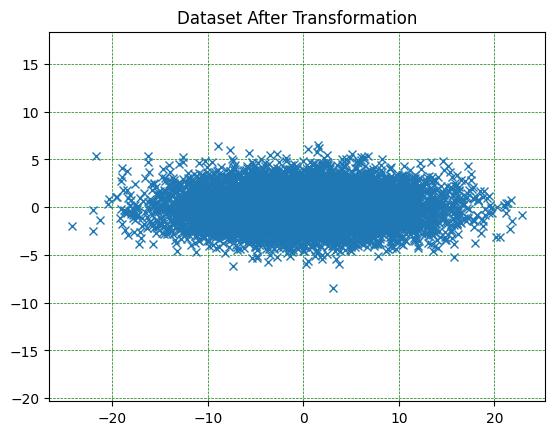

In [5]:
custom_pca = Custom_PCA(2)
custom_pca.fit(z.T)
print(custom_pca.components)
zn = custom_pca.transform(z.T)

x, y = zn.T

plt.plot(x, y, 'x')
plt.axis('equal')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Dataset After Transformation')
plt.show()

#### Direction of principal components of the generated distribution

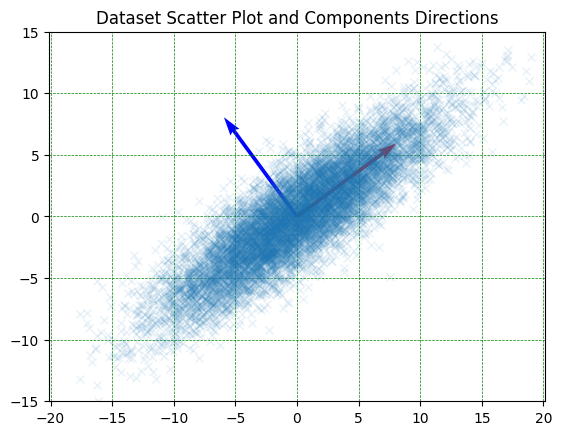

In [6]:
# Vector origin location
X = [0, 0]
Y = [0, 0]

# Directional vectors
U = 10*custom_pca.components[:, 0]
V = 10*custom_pca.components[:, 1]

x, y = z

plt.plot(x, y, 'x', alpha=0.1)
plt.quiver(X, Y, U, V, color=['r', 'b'], units='xy', scale=1)
plt.axis('equal')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Dataset Scatter Plot and Components Directions')
plt.show()

#### Ploting original generated distribution with and without principal components

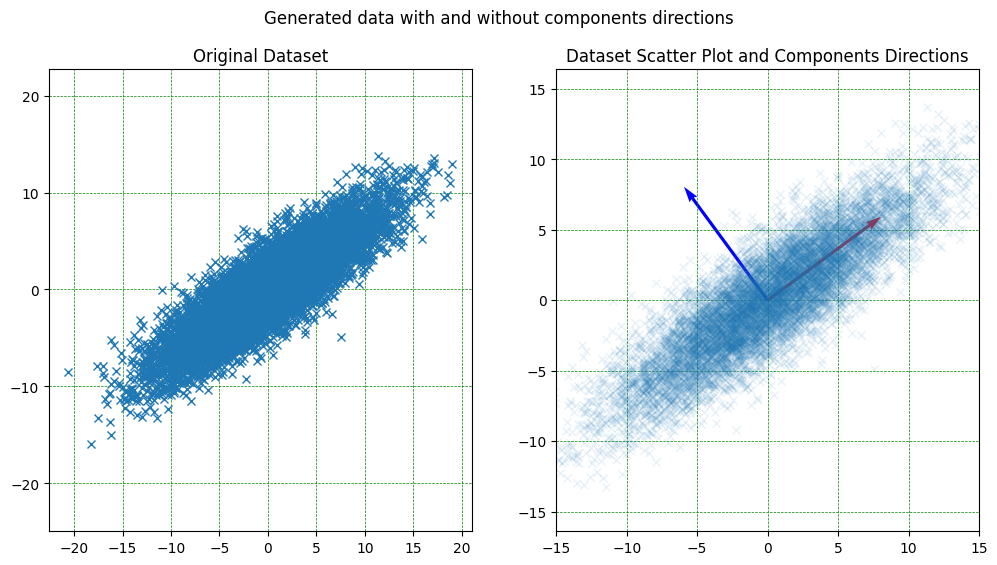

In [7]:
#plot 1:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
x, y = z
plt.plot(x, y, 'x')
plt.axis('equal')
plt.title('Original Dataset')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

#plot 2:
plt.subplot(1, 2, 2)
plt.plot(x, y, 'x', alpha=0.1)
plt.quiver(X, Y, U, V, color=['r', 'b'], units='xy', scale=1)
plt.axis('equal')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Dataset Scatter Plot and Components Directions')
plt.suptitle("Generated data with and without components directions")
plt.show()

#### Direction of principal components of the generated distribution, obtained with scikit-learn PCA

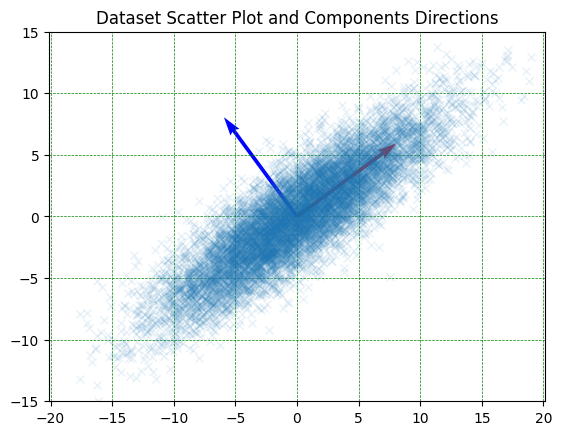

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(z.T)

# Vector origin location
X = [0, 0]
Y = [0, 0]

# Directional vectors
U = -10*pca.components_[:, 0]
V = -10*pca.components_[:, 1]

x, y = z

plt.plot(x, y, 'x', alpha=0.1)
plt.quiver(X, Y, U, V, color=['r', 'b'], units='xy', scale=1)
plt.axis('equal')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Dataset Scatter Plot and Components Directions')
plt.show()

keep in mind that directions of the pricipal components are the same in both experiments with custom_PCA class and sci-kit learn PCA class.

## Example 2

### Using custom PCA class

#### Generating a dataset with 3 classes

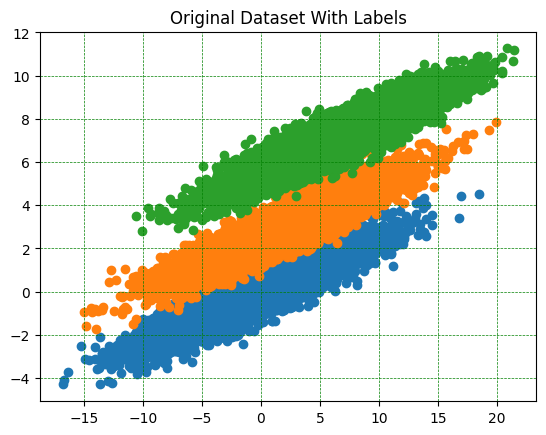

In [9]:
mean1 = [0, 0]
mean2 = [2, 3]
mean3 = [6, 7]

cov = [[20, 5], [5, 1]]  # diagonal covariance

x1 = np.random.multivariate_normal(mean1, cov, 10000).T
x2 = np.random.multivariate_normal(mean2, cov, 10000).T
x3 = np.random.multivariate_normal(mean3, cov, 10000).T

plt.scatter(x1[0, :], x1[1, :])
plt.scatter(x2[0, :], x2[1, :])
plt.scatter(x3[0, :], x3[1, :])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Original Dataset With Labels')
plt.show()

#### Ignoring the class labels

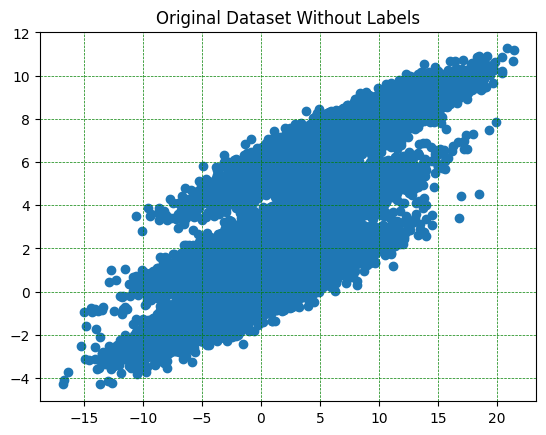

In [10]:
xt = np.concatenate((x1, x2, x3), axis=1)
plt.scatter(xt[0, :], xt[1, :])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Original Dataset Without Labels')
plt.show()

#### Direction of principal components of the generated dataset and transforming data using the components obtained from PCA (without dimensionality reduction)

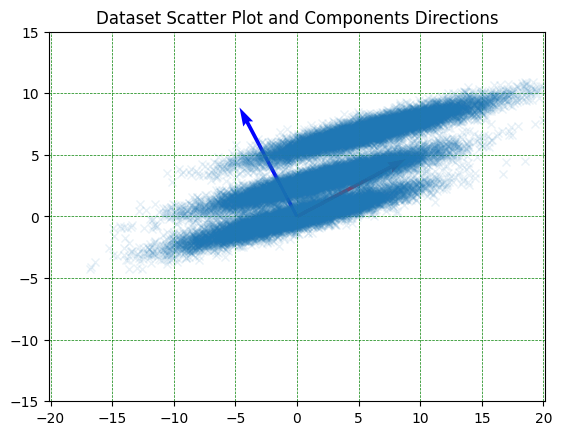

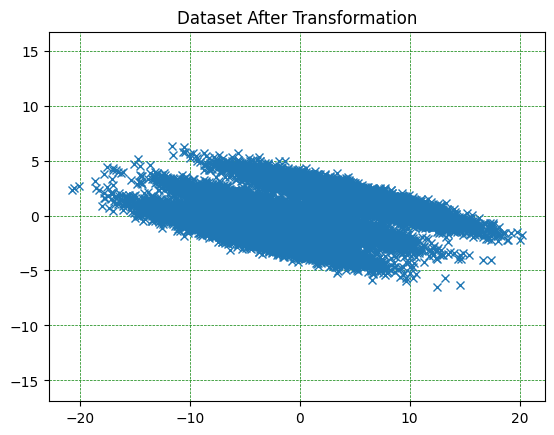

In [11]:
custom_pca = Custom_PCA(2)
custom_pca.fit(xt.T)
zn = custom_pca.transform(xt.T)

# Vector origin location
X = [0, 0]
Y = [0, 0]

# Directional vectors
U = 10*custom_pca.components[:, 0]
V = 10*custom_pca.components[:, 1]

x, y = xt

plt.plot(x, y, 'x', alpha=0.1)
plt.quiver(X, Y, U, V, color=['r', 'b'], units='xy', scale=1)
plt.axis('equal')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Dataset Scatter Plot and Components Directions')
plt.show()

x, y = zn.T

plt.plot(x, y, 'x')
plt.axis('equal')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Dataset After Transformation')
plt.show()

#### Plotting generated dataset with and without components directions

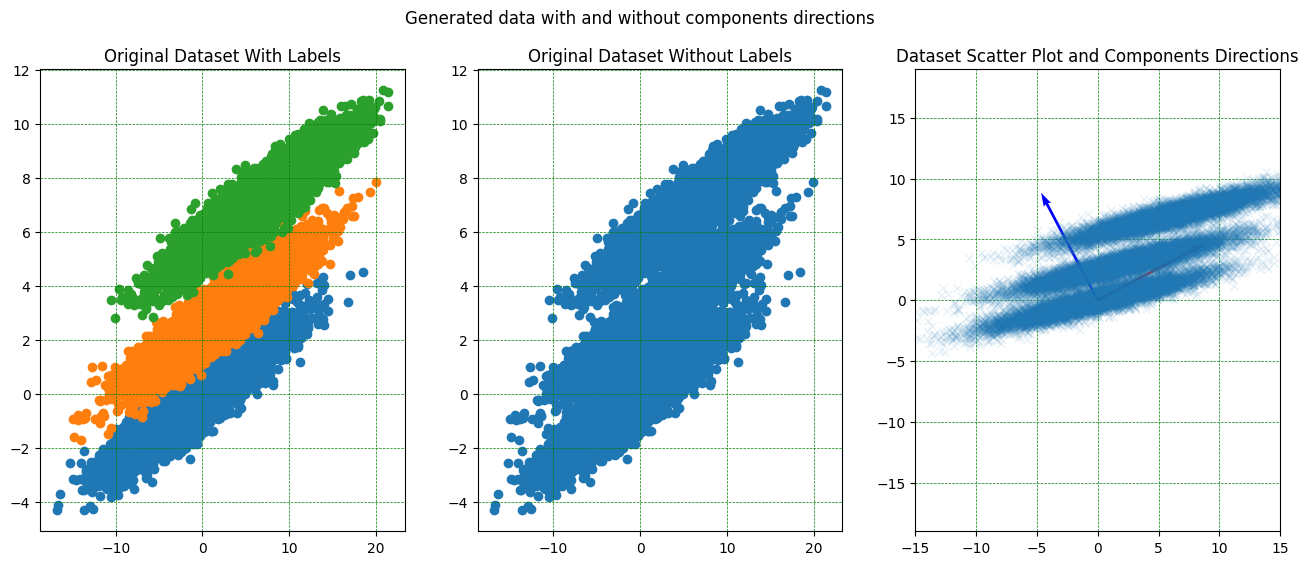

In [12]:
#plot 1:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.scatter(x1[0, :], x1[1, :])
plt.scatter(x2[0, :], x2[1, :])
plt.scatter(x3[0, :], x3[1, :])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Original Dataset With Labels')

#plot 2:
plt.subplot(1, 3, 2)
plt.scatter(xt[0, :], xt[1, :])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Original Dataset Without Labels')

#plot 2:
plt.subplot(1, 3, 3)
x, y = xt
plt.plot(x, y, 'x', alpha=0.1)
plt.quiver(X, Y, U, V, color=['r', 'b'], units='xy', scale=1)
plt.axis('equal')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Dataset Scatter Plot and Components Directions')
plt.suptitle("Generated data with and without components directions")
plt.show()

#### Transforming Along 1st Principal Component (reducing 1 dimension)

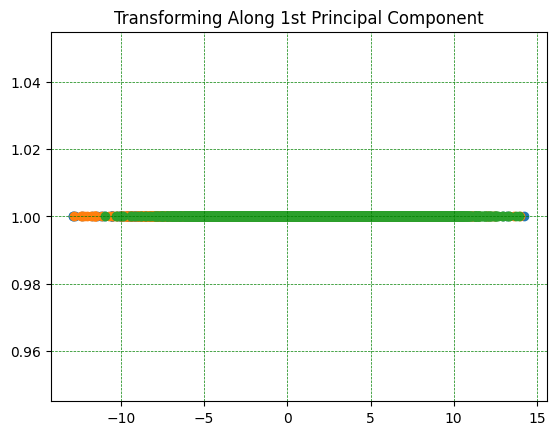

In [13]:
principal1 = np.matmul(custom_pca.components[:, 0].reshape((1, 2)), xt)
principal1.shape
plt.scatter(principal1[0, :10000], np.ones_like(principal1[0, :10000]))
plt.scatter(principal1[0, 10000:20000], np.ones_like(principal1[0, :10000]))
plt.scatter( principal1[0, 20000:30000], np.ones_like(principal1[0, :10000]))

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transforming Along 1st Principal Component')
plt.show()

#### Transforming Along 2nd Principal Component (reducing 1 dimension)

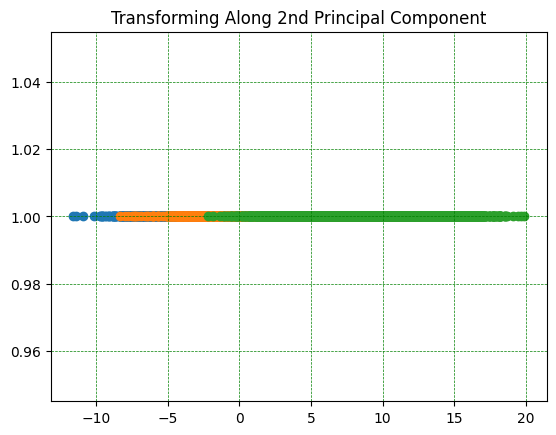

In [14]:
principal2 = np.matmul(custom_pca.components[:, 1].reshape((1, 2)), xt)
principal2.shape
plt.scatter(principal2[0, :10000], np.ones_like(principal2[0, :10000]))
plt.scatter(principal2[0, 10000:20000], np.ones_like(principal2[0, :10000]))
plt.scatter( principal2[0, 20000:30000], np.ones_like(principal2[0, :10000]))

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transforming Along 2nd Principal Component')
plt.show()

Keep in mind that dimension 1 has maximum variance but dimension 2 has maximum seperability.

#### Original dataset and transformed versions along direction of principal components

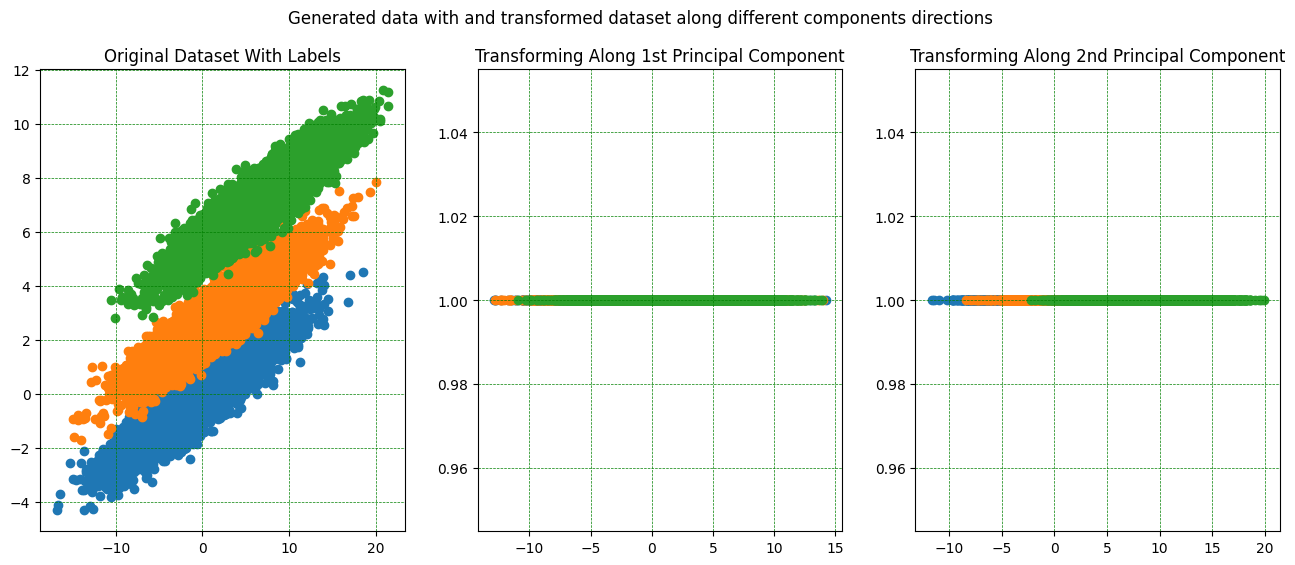

In [15]:
#plot 1:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.scatter(x1[0, :], x1[1, :])
plt.scatter(x2[0, :], x2[1, :])
plt.scatter(x3[0, :], x3[1, :])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Original Dataset With Labels')

#plot 2:
plt.subplot(1, 3, 2)
plt.scatter(principal1[0, :10000], np.ones_like(principal1[0, :10000]))
plt.scatter(principal1[0, 10000:20000], np.ones_like(principal1[0, :10000]))
plt.scatter( principal1[0, 20000:30000], np.ones_like(principal1[0, :10000]))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transforming Along 1st Principal Component')

#plot 3:
plt.subplot(1, 3, 3)
plt.scatter(principal2[0, :10000], np.ones_like(principal2[0, :10000]))
plt.scatter(principal2[0, 10000:20000], np.ones_like(principal2[0, :10000]))
plt.scatter( principal2[0, 20000:30000], np.ones_like(principal2[0, :10000]))

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transforming Along 2nd Principal Component')
plt.suptitle("Generated data with and transformed dataset along different components directions")
plt.show()

### **scikit-learn PCA**: Direction of principal components of the generated distribution and transforming data along 1st and 2nd principal components

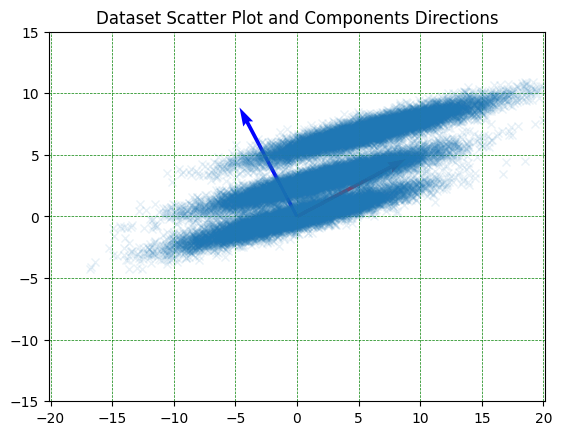

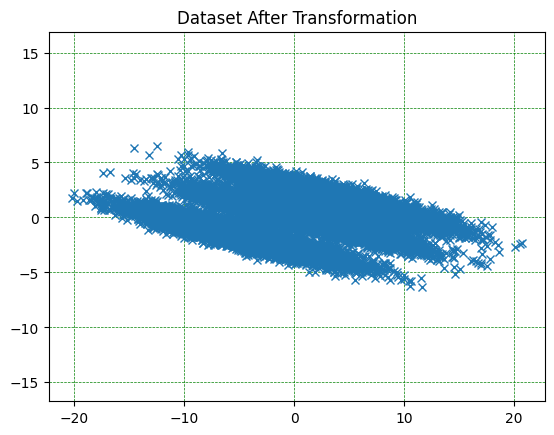

In [16]:
pca = PCA(n_components=2)
pca.fit(xt.T)
zn = pca.transform(xt.T)

# Vector origin location
X = [0, 0]
Y = [0, 0]

# Directional vectors
U = -10*pca.components_[:, 0]
V = -10*pca.components_[:, 1]

x, y = xt

plt.plot(x, y, 'x', alpha=0.1)
plt.quiver(X, Y, U, V, color=['r', 'b'], units='xy', scale=1)
plt.title('Single Vector')
plt.axis('equal')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Dataset Scatter Plot and Components Directions')
plt.show()

x, y = zn.T

plt.plot(x, y, 'x')
plt.axis('equal')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Dataset After Transformation')
plt.show()

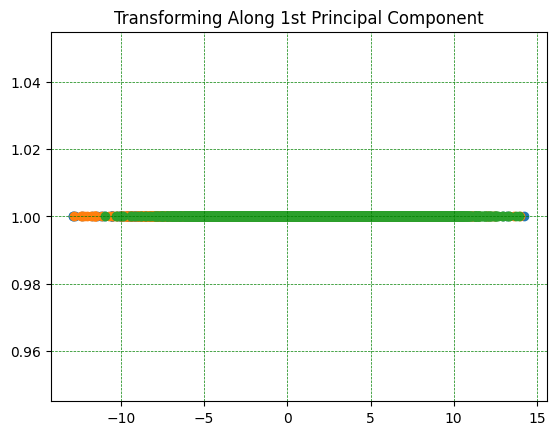

In [17]:
principal1 = -np.matmul(pca.components_[:, 0].reshape((1, 2)), xt)
principal1.shape
plt.scatter(principal1[0, :10000], np.ones_like(principal1[0, :10000]))
plt.scatter(principal1[0, 10000:20000], np.ones_like(principal1[0, :10000]))
plt.scatter( principal1[0, 20000:30000], np.ones_like(principal1[0, :10000]))

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transforming Along 1st Principal Component')
plt.show()

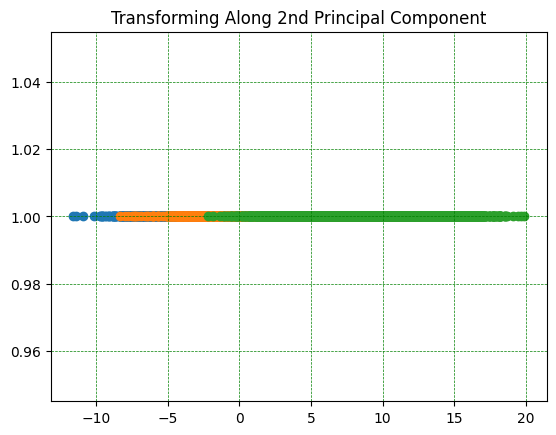

In [18]:
principal2 = -np.matmul(pca.components_[:, 1].reshape((1, 2)), xt)
principal2.shape
plt.scatter(principal2[0, :10000], np.ones_like(principal2[0, :10000]))
plt.scatter(principal2[0, 10000:20000], np.ones_like(principal2[0, :10000]))
plt.scatter( principal2[0, 20000:30000], np.ones_like(principal2[0, :10000]))

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transforming Along 2nd Principal Component')
plt.show()

# 2-LDA

## Using **custom LDA** class

In [19]:
# Custom LDA class
class Custom_LDA:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, x, y):
        """this method take input features and labels and compute SW and SB according to:

               Within class scatter matrix:
               SW = sum((X_c - mean_X_c)^2 )

               Between class scatter:
               SB = sum( n_c * (mean_X_c - mean_overall)^2 )
            and computes a seperability measure:
               A = (SW^-1)SB
            and finally calculates a Transformation Matrix based on A's eigenvalues and eigenvectors.
        """
        n_features = x.shape[1]
        class_labels = np.unique(y)

        mean_overall = np.mean(x, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            x_c = x[np.where(y==c)[0]]
            mean_c = np.mean(x_c, axis=0)
            SW += (x_c - mean_c).T.dot((x_c - mean_c))
            n_c = x_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, x):
        '''this function takes input data and return the transformed version of the input based on
        the Transformation Matrix we calculated previously in 'fit' method.'''
        return np.dot(x, self.linear_discriminants.T)

### Generating a dataset with 3 classes

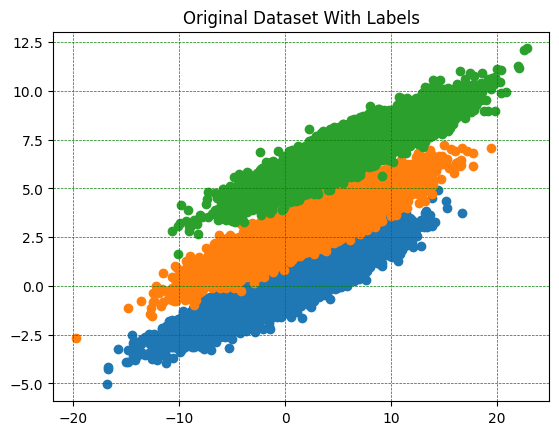

In [20]:
mean1 = [0, 0]
mean2 = [2, 3]
mean3 = [6, 7]

cov = [[20, 5], [5, 1]]  # diagonal covariance

x1 = np.random.multivariate_normal(mean1, cov, 10000).T
x2 = np.random.multivariate_normal(mean2, cov, 10000).T
x3 = np.random.multivariate_normal(mean3, cov, 10000).T

xt = np.concatenate((x1, x2, x3), axis=1)
yt = np.ones((30000))
yt[:10000] = 0
yt[10000:20000] = 1
yt[20000:30000] = 2
# yt = yt.astype('int')

plt.scatter(x1[0, :], x1[1, :])
plt.scatter(x2[0, :], x2[1, :])
plt.scatter(x3[0, :], x3[1, :])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Original Dataset With Labels')
plt.show()

### Transforming dataset without dimensionality reduction

In [21]:
custom_lda = Custom_LDA(2)
custom_lda.fit(xt.T, yt)
x_projected = custom_lda.transform(xt.T)

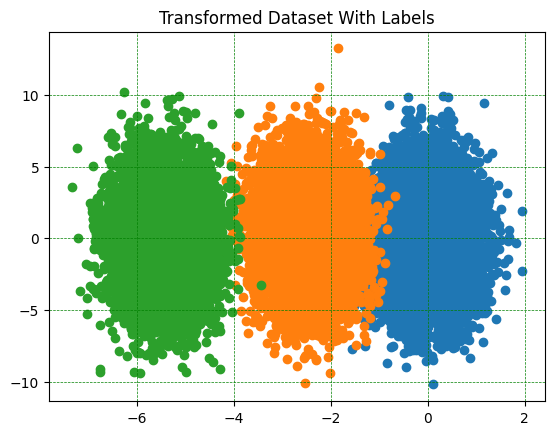

In [22]:
plt.scatter(x_projected.T[0, :10000], x_projected.T[1, :10000])
plt.scatter(x_projected.T[0, 10000:20000], x_projected.T[1, 10000:20000])
plt.scatter(x_projected.T[0, 20000:30000], x_projected.T[1, 20000:30000])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transformed Dataset With Labels')
plt.show()

### Transforming Along 1st Dimension (reducing 1 dimension)

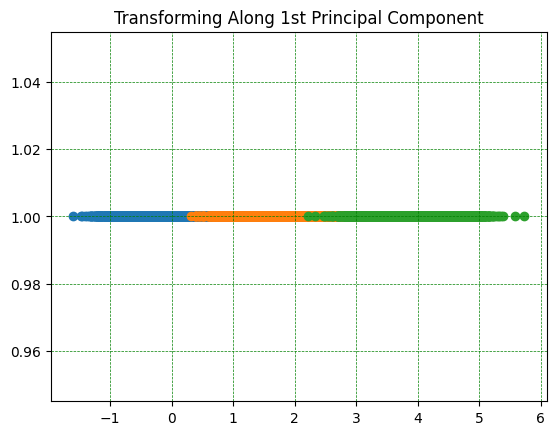

In [23]:
principal1 = -np.matmul(custom_lda.linear_discriminants[:, 0].reshape((1, 2)), xt)
principal1.shape
plt.scatter(principal1[0, :10000], np.ones_like(principal1[0, :10000]))
plt.scatter(principal1[0, 10000:20000], np.ones_like(principal1[0, :10000]))
plt.scatter( principal1[0, 20000:30000], np.ones_like(principal1[0, :10000]))

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transforming Along 1st Principal Component')
plt.show()

### Transforming Along 2nd Dimension (reducing 1 dimension)

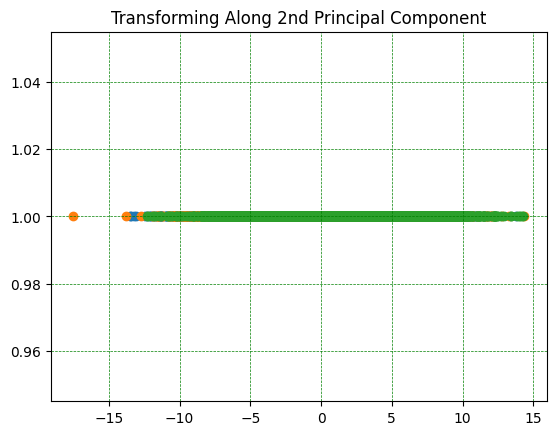

In [24]:
principal2 = -np.matmul(custom_lda.linear_discriminants[:, 1].reshape((1, 2)), xt)
principal2.shape
plt.scatter(principal2[0, :10000], np.ones_like(principal2[0, :10000]))
plt.scatter(principal2[0, 10000:20000], np.ones_like(principal2[0, :10000]))
plt.scatter( principal2[0, 20000:30000], np.ones_like(principal2[0, :10000]))

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transforming Along 2nd Principal Component')
plt.show()

### Plotting original dataset, transformation without dimensionality reduction and transformation along 1st and 2nd component directions

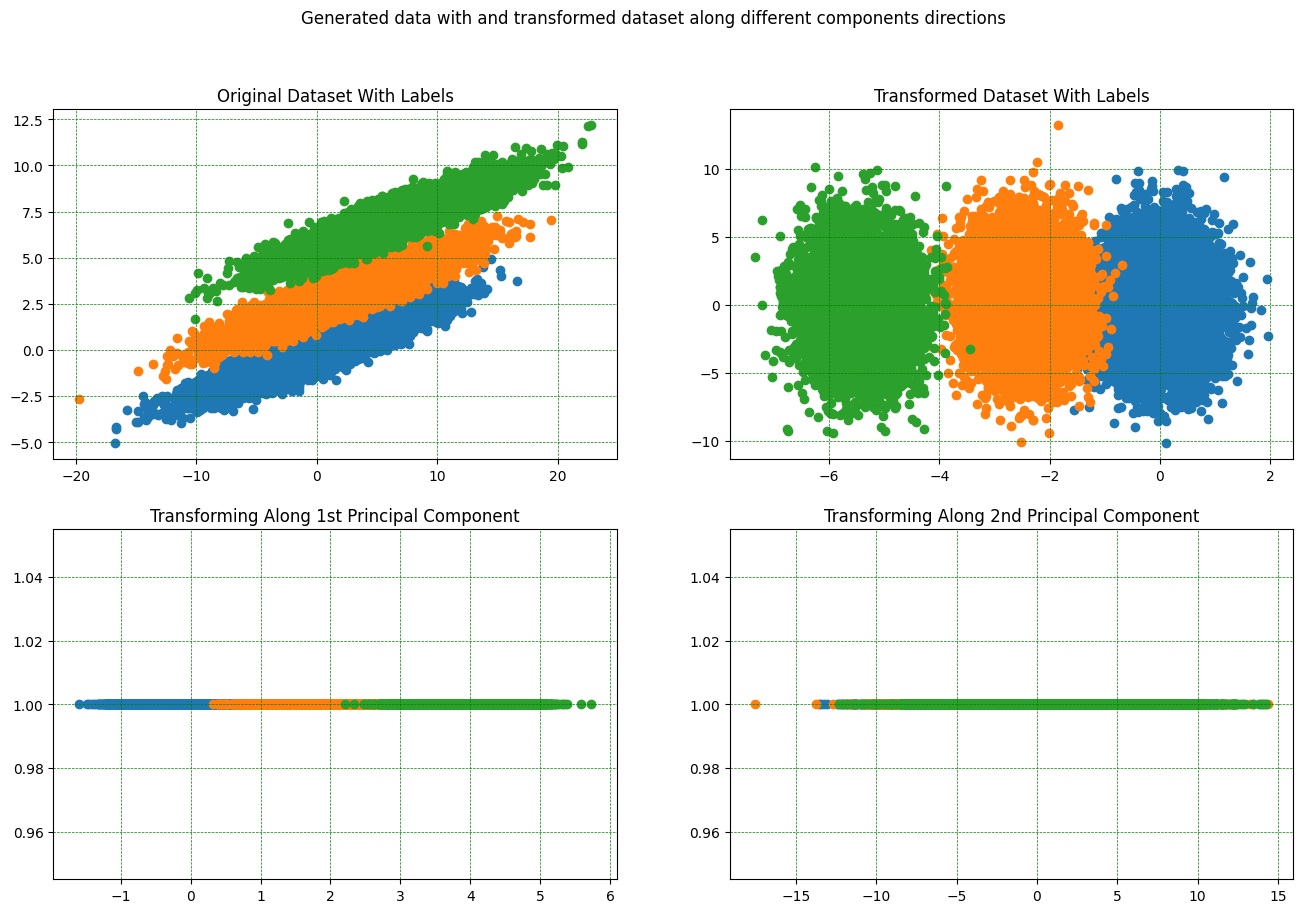

In [25]:
#plot 1:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.scatter(x1[0, :], x1[1, :])
plt.scatter(x2[0, :], x2[1, :])
plt.scatter(x3[0, :], x3[1, :])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Original Dataset With Labels')

#plot 2:
plt.subplot(2, 2, 2)
plt.scatter(x_projected.T[0, :10000], x_projected.T[1, :10000])
plt.scatter(x_projected.T[0, 10000:20000], x_projected.T[1, 10000:20000])
plt.scatter(x_projected.T[0, 20000:30000], x_projected.T[1, 20000:30000])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transformed Dataset With Labels')

#plot 3:
plt.subplot(2, 2, 3)
plt.scatter(principal1[0, :10000], np.ones_like(principal1[0, :10000]))
plt.scatter(principal1[0, 10000:20000], np.ones_like(principal1[0, :10000]))
plt.scatter( principal1[0, 20000:30000], np.ones_like(principal1[0, :10000]))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transforming Along 1st Principal Component')

#plot 4:
plt.subplot(2, 2, 4)
plt.scatter(principal2[0, :10000], np.ones_like(principal2[0, :10000]))
plt.scatter(principal2[0, 10000:20000], np.ones_like(principal2[0, :10000]))
plt.scatter( principal2[0, 20000:30000], np.ones_like(principal2[0, :10000]))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transforming Along 2nd Principal Component')
plt.suptitle("Generated data with and transformed dataset along different components directions")
plt.show()

## using scikit-learn LDA implementation for transforming data

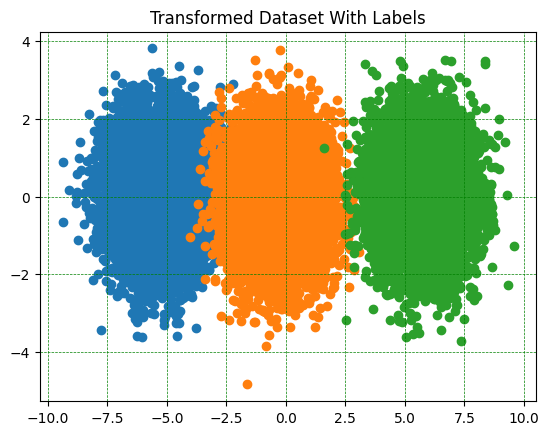

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(xt.T, yt)
x_projected = lda.transform(xt.T)

plt.scatter(x_projected.T[0, :10000], x_projected.T[1, :10000])
plt.scatter(x_projected.T[0, 10000:20000], x_projected.T[1, 10000:20000])
plt.scatter(x_projected.T[0, 20000:30000], x_projected.T[1, 20000:30000])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Transformed Dataset With Labels')
plt.show()